In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
print(sklearn.__version__)

1.2.2


In [ ]:

df_wine = pd.read_csv("../content/winequalityN.csv")
# X = df_wine.data
# y = df_wine.target

print(df_wine.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [ ]:
# print(X)
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
df_wine.isna().sum()
df_wine = df_wine.dropna()

In [ ]:
sns.pairplot(df_wine, hue='quality')
plt.show()

In [ ]:
df_wine.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

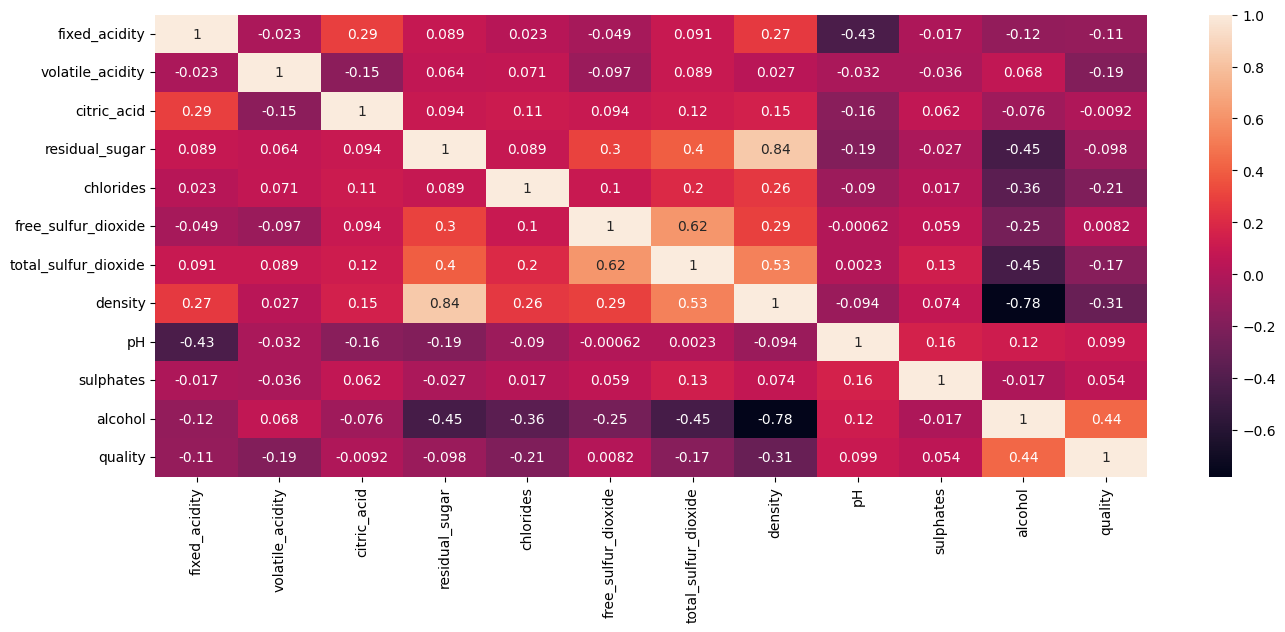

In [ ]:

plt.figure(figsize=(16,6))

sns.heatmap(df_wine.corr(), annot=True)

In [ ]:
corr_m = df_wine.corr()
print(corr_m['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.444319
citric acid             0.085706
free sulfur dioxide     0.055463
sulphates               0.038729
pH                      0.019366
residual sugar         -0.036825
total sulfur dioxide   -0.041385
fixed acidity          -0.077031
chlorides              -0.200886
volatile acidity       -0.265953
density                -0.305858
Name: quality, dtype: float64


<ipython-input-42-d612a2448123>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m = df_wine.corr()


In [ ]:
X = df_wine[['alcohol', 'density', 'chlorides', 'volatile acidity', 'total sulfur dioxide']]
X.isna().sum()

alcohol                 0
density                 0
chlorides               0
volatile acidity        0
total sulfur dioxide    0
dtype: int64

In [ ]:
y = df_wine['quality']
y.isna().sum()

0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# models = [
#     ("Logistic Regression", LogisticRegression(random_state = 31)),
#     ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
#     ("Linear SVM", SVC(kernel='linear', random_state = 31)),
#     ("Kernel SVM (RBF Kernel)", SVC(kernel='rbf', random_state = 31)),
#     ("Naïve Bayes", GaussianNB()), # Random state not supported
#     ("Decision Tree", DecisionTreeClassifier(random_state = 31)),
#     ("Random Forest", RandomForestClassifier(n_estimators=10, random_state = 31)),
#     ("XGBoost", xgb.XGBClassifier(use_label_encoder=True, eval_metric='mlogloss', random_state = 31))
# ]

# # Applying models and printing accuracy and confusion matrix
# le = LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)
# y_test_encoded = le.transform(y_test)

# results = pd.DataFrame(columns=["Model", "Accuracy", "Confusion Matrix"])


# for name, model in models:
#     # Fit the model, XG Boost needs the class values changed
#     model.fit(X_train, y_train_encoded if name == 'XGBoost' else y_train)

#     predictions = model.predict(X_test)

#     # XG Boost needs the class converted
#     if name == 'XGBoost':
#         predictions = le.inverse_transform(predictions)


#     accuracy = accuracy_score(y_test, predictions)

#     results = pd.concat([results, pd.DataFrame({
#         "Model": [name],
#         "Accuracy": [accuracy],
#     })], ignore_index=True)

# # Display the results
# print(results)

In [ ]:
import pickle

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=10, random_state=31)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = random_forest_model.predict(X_test)

# Evaluate accuracy (optional)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Serialize the model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

Accuracy: 0.629950495049505
